# Bank Marketing - Product Subscription Prediction

## Exploratory Data Analysis

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [2]:
#df_bank=pd.read_csv("data/bank.csv",sep=";")
df=pd.read_csv("data/bank-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.shape

(45211, 17)

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Handling Duplicates

In [11]:
df.duplicated().sum()

0

### Handling Missing Values

In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

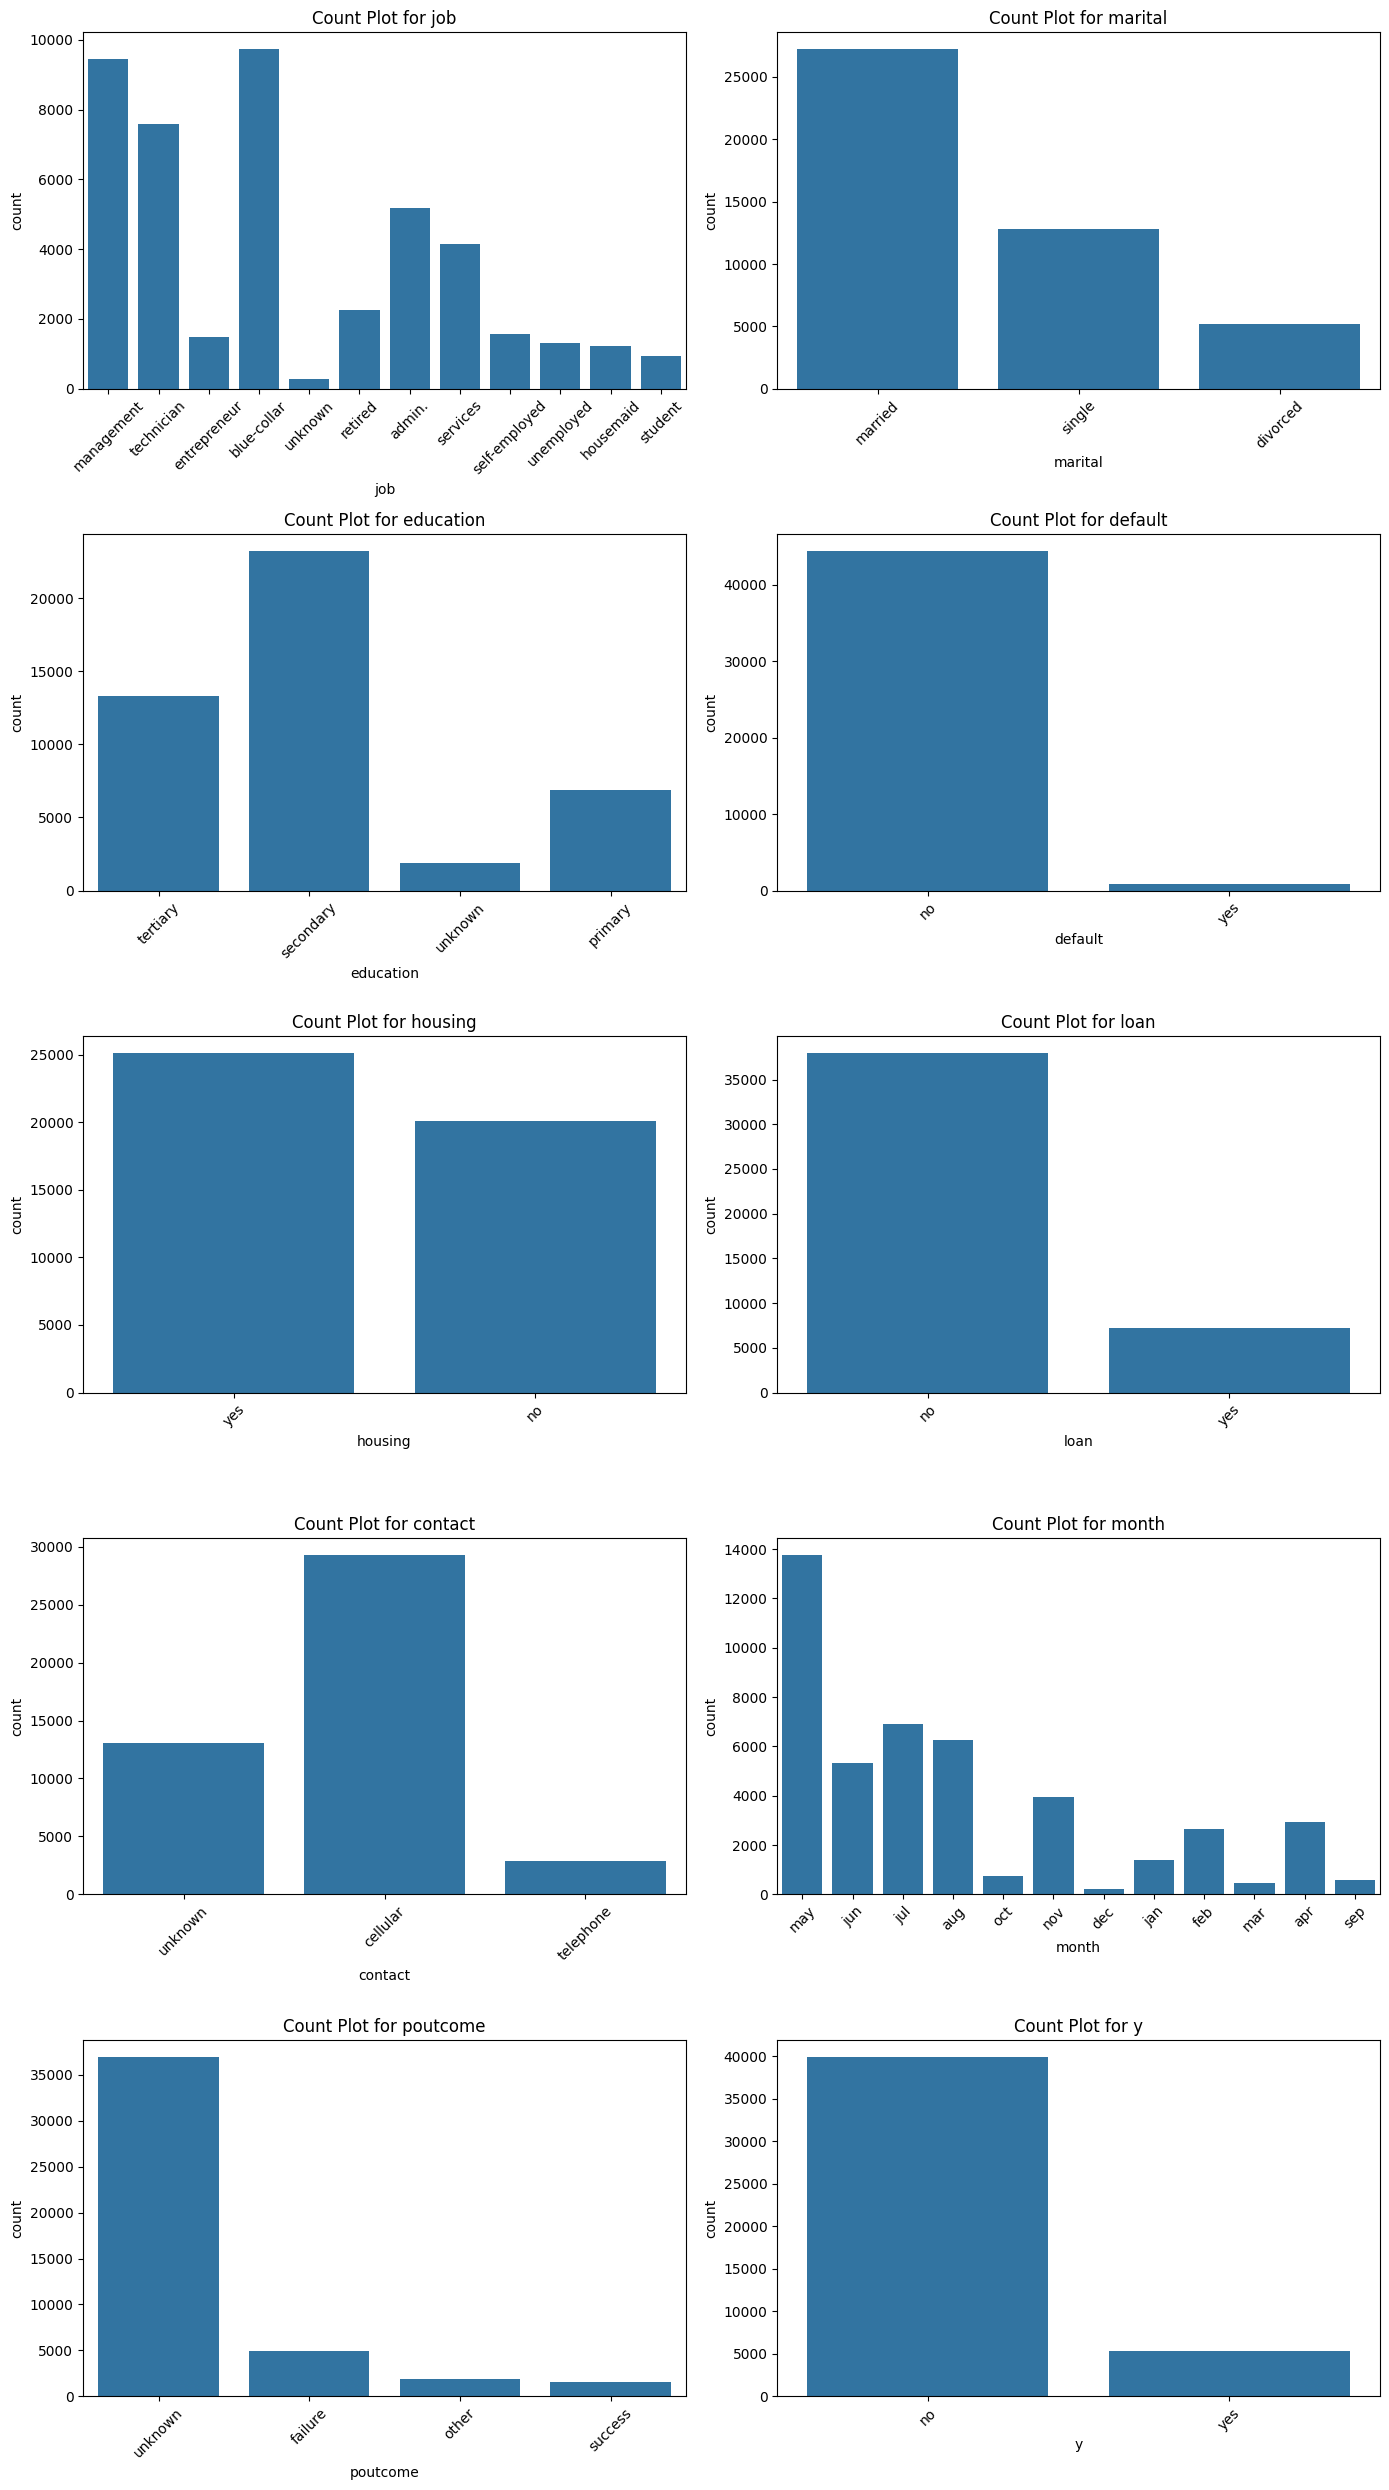

In [14]:
def plot_count_for_categorical_columns(df):
    categorical_columns = df.select_dtypes(include='object').columns
    num_columns = len(categorical_columns)
    
    # Set the number of rows for subplots (2 columns per row)
    num_rows = (num_columns + 1) // 2  # Round up division

    fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot for {column}')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Call the function with your dataframe
plot_count_for_categorical_columns(df)

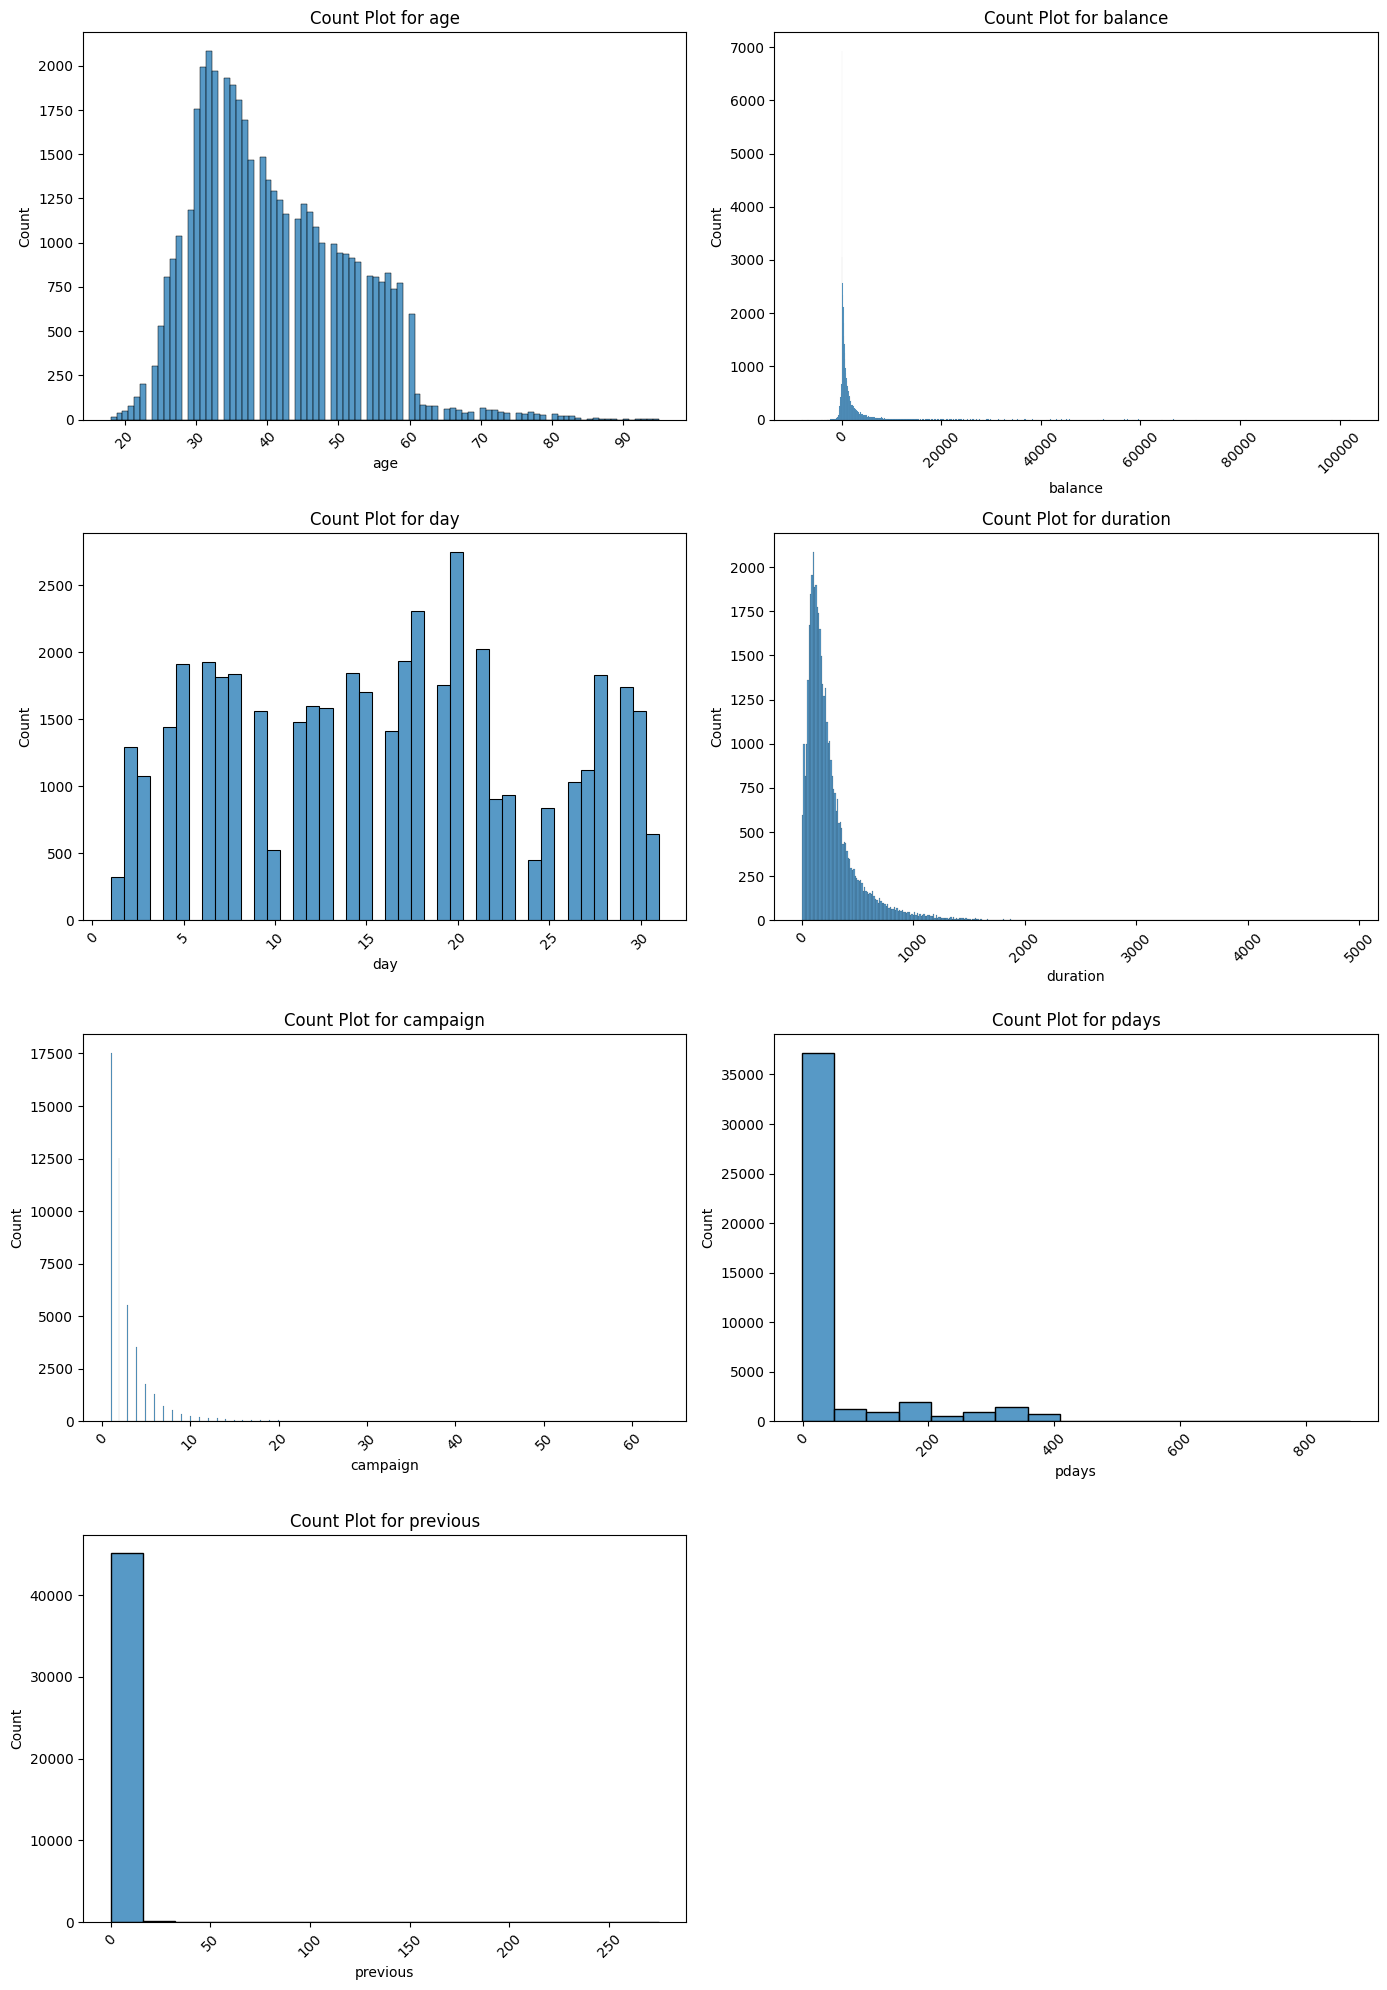

In [15]:
def plot_count_for_categorical_columns(df):
    numeric_columns = df.select_dtypes(exclude='object').columns
    num_columns = len(numeric_columns)
    
    # Set the number of rows for subplots (2 columns per row)
    num_rows = (num_columns + 1) // 2  # Round up division

    fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    for i, column in enumerate(numeric_columns):
        sns.histplot(x=column, data=df, ax=axes[i])
        axes[i].set_title(f'Count Plot for {column}')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Call the function with your dataframe
plot_count_for_categorical_columns(df)


### Data Cleaning

In [16]:
month_mapping={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month']=df['month'].map(month_mapping)

In [17]:
y_map={'yes':1,'no':0}
df['y']=df['y'].map(y_map)

In [18]:
education_order={'unknown':0,'primary':1,'secondary':2,'tertiary':3}
df['education']=df['education'].map(education_order)

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,0,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,0,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [20]:
df.to_csv("data/bank_marketing_cleaned.csv")